In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
! pip install -q kaggle


In [ ]:
from sklearn.impute import KNNImputer
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
#from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")
DeprecationWarning("ignore")
FutureWarning("ignore")

FutureWarning('ignore')

In [6]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
replace city_day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
city_day=pd.read_csv('/content/city_day.csv')
city_hour=pd.read_csv('/content/city_hour.csv')
station_day=pd.read_csv('/content/station_day.csv')
station_hour=pd.read_csv('/content/station_hour.csv')
stations=pd.read_csv('/content/stations.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print(city_hour.head())
print(station_day.head())

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
        City             Datetime  PM2.5  PM10    NO    NO2    NOx  NH3    CO  \
0  Ahmedabad  2015-01-01 01:00:00    NaN   NaN  1.00  40.01  36.37  NaN  1.00   
1  Ahmedabad  2015-01-01 02

In [ ]:
df = station_day.merge(stations, on = "StationId")   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108035 entries, 0 to 108034
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StationId    108035 non-null  object 
 1   Date         108035 non-null  object 
 2   PM2.5        86410 non-null   float64
 3   PM10         65329 non-null   float64
 4   NO           90929 non-null   float64
 5   NO2          91488 non-null   float64
 6   NOx          92535 non-null   float64
 7   NH3          59930 non-null   float64
 8   CO           95037 non-null   float64
 9   SO2          82831 non-null   float64
 10  O3           82467 non-null   float64
 11  Benzene      76580 non-null   float64
 12  Toluene      69333 non-null   float64
 13  Xylene       22898 non-null   float64
 14  AQI          87025 non-null   float64
 15  AQI_Bucket   87025 non-null   object 
 16  StationName  108035 non-null  object 
 17  City         108035 non-null  object 
 18  State        108035 non-

In [ ]:
df.isna().sum()

StationId          0
Date               0
PM2.5          21625
PM10           42706
NO             17106
NO2            16547
NOx            15500
NH3            48105
CO             12998
SO2            25204
O3             25568
Benzene        31455
Toluene        38702
Xylene         85137
AQI            21010
AQI_Bucket     21010
StationName        0
City               0
State              0
Status           324
dtype: int64

In [ ]:
sub_class={np.nan:0,"Active":1,"Inactive":2}
df["Status"]=df["Status"].map(sub_class)
df["Status"]=df["Status"].astype("category")

In [ ]:
vax = df.select_dtypes(np.float64).columns

In [ ]:
corrl=[]
def cor(x):
    a=df["AQI"].corr(x)
    return corrl.append(a)

In [ ]:
cor(df["PM2.5"])
cor(df["PM10"])
cor(df["NO"])
cor(df["NO2"])
cor(df["NOx"])
cor(df["NH3"])
cor(df["CO"])
cor(df["SO2"])
cor(df["O3"])
cor(df["Benzene"])
cor(df["Toluene"])
cor(df["Xylene"])


In [ ]:
var=[col for col in df.columns if df[col].dtypes !="O"]
var.remove("AQI")
var.remove("Status") 

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer=IterativeImputer(min_value=0)
imputer.fit(df[var])

IterativeImputer(min_value=0)

In [ ]:
stations=pd.DataFrame(imputer.transform(df[var]))

In [ ]:
stations.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [ ]:
stations

,0,1,2,3,4,5,6,7,8,9,10,11
0,71.36,115.75,1.750000,20.650000,12.400000,12.190000,0.10,10.76,109.26,0.17,5.92,0.100000
1,81.40,124.50,1.440000,20.500000,12.080000,10.720000,0.12,15.24,127.09,0.20,6.50,0.060000
2,78.32,129.06,1.260000,26.000000,14.850000,10.280000,0.14,26.96,117.44,0.22,7.95,0.080000
3,88.76,135.32,6.600000,30.850000,21.770000,12.910000,0.11,33.59,111.81,0.29,7.63,0.120000
4,64.18,104.09,2.560000,28.070000,17.010000,11.420000,0.09,19.00,138.18,0.17,5.02,0.070000
...,...,...,...,...,...,...,...,...,...,...,...,...
108030,8.65,16.46,2.739921,17.286587,14.700694,19.520552,0.69,4.36,30.59,1.32,7.26,0.000000
108031,11.80,18.47,2.987294,18.623326,15.807085,20.207771,0.68,3.49,38.95,1.42,7.92,0.000000
108032,18.60,32.26,13.650000,200.870000,214.200000,11.400000,0.78,5.12,38.17,3.52,8.64,1.165432
108033,16.07,39.30,7.560000,29.130000,36.690000,29.260000,0.69,5.88,29.64,1.86,8.40,0.000000


In [ ]:
df.columns

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State', 'Status'],
      dtype='object')

In [ ]:
stations["City"]=df["City"]
stations["Date"]=df["Date"] 
stations["StationId"]=df["StationId"]
stations["StationName"]=df["StationName"]
stations["State"]=df["State"]
stations["Status"]=df["Status"]

In [ ]:
column_names=['Date','StationId','State','StationName','City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene','Status']
stations=stations.reindex(columns=column_names)

In [ ]:
df

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,1
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,1
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,1
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,1
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,2020-06-27,8.65,16.46,NaN,NaN,NaN,NaN,0.69,4.36,30.59,1.32,7.26,NaN,50.0,Good,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,1
108031,WB013,2020-06-28,11.80,18.47,NaN,NaN,NaN,NaN,0.68,3.49,38.95,1.42,7.92,NaN,65.0,Satisfactory,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,1
108032,WB013,2020-06-29,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,NaN,63.0,Satisfactory,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,1
108033,WB013,2020-06-30,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,NaN,57.0,Satisfactory,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,1


In [ ]:
df=pd.read_csv("city_day.csv")

In [ ]:
df.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
var = df.select_dtypes(np.float64).columns


In [ ]:
corrl=[]
def cor(x):
    a=df["AQI"].corr(x)
    return corrl.append(a)

In [ ]:
cor(df["PM2.5"])
cor(df["PM10"])
cor(df["NO"])
cor(df["NO2"])
cor(df["NOx"])
cor(df["NH3"])
cor(df["CO"])
cor(df["SO2"])
cor(df["O3"])
cor(df["Benzene"])
cor(df["Toluene"])
cor(df["Xylene"])

In [ ]:
from tabulate import tabulate
table=[var,corrl]
print(tabulate({"Variable":var,"Correaltion":corrl},headers=["Variable","Correlation"]))

Variable      Correlation
----------  -------------
PM2.5           0.659181
PM10            0.803313
NO              0.452191
NO2             0.537071
NOx             0.48645
NH3             0.252019
CO              0.683346
SO2             0.490586
O3              0.198991
Benzene         0.0444067
Toluene         0.279992
Xylene          0.165532
AQI


In [ ]:
var=[col for col in df.columns if df[col].dtypes !="O"]
var

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI']

In [ ]:
imputer=KNNImputer(n_neighbors=5,weights="distance")    
imputer.fit(df[var])

KNNImputer(weights='distance')

In [ ]:
dc=pd.DataFrame(imputer.transform(df[var]))

In [ ]:
dc.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [ ]:
dc.columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene','AQI']

In [ ]:
dc["City"]=df["City"]
dc["Date"]=df["Date"]

In [ ]:
column_names=['Date','City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene',"AQI"]
dc=dc.reindex(columns=column_names)

In [ ]:
dc

,Date,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,2015-01-01,Ahmedabad,25.338390,137.843241,0.92,18.22,17.15,10.058427,0.92,27.64,133.36,0.00,0.02,0.00,120.025927
1,2015-01-02,Ahmedabad,25.568675,144.263876,0.97,15.69,16.46,9.723427,0.97,24.55,34.06,3.68,5.50,3.77,130.791651
2,2015-01-03,Ahmedabad,115.057620,165.891366,17.40,19.30,29.70,8.948120,17.40,29.07,30.70,6.80,16.40,2.25,344.272735
3,2015-01-04,Ahmedabad,39.372665,184.350858,1.70,18.48,17.97,11.393357,1.70,18.59,36.08,4.43,10.14,1.00,146.963405
4,2015-01-05,Ahmedabad,158.694621,216.522624,22.10,21.42,37.76,9.030260,22.10,39.33,39.31,7.01,18.89,2.78,390.145889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24,12.07,0.73,41.000000
29527,2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74,2.21,0.38,70.000000
29528,2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01,0.01,0.00,68.000000
29529,2020-06-30,Visakhapatnam,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00,0.00,0.00,54.000000


In [ ]:
class AQI():
    def __init__(self):
        pass
    
    def AQI_bucket(x):
            if x <= 50:
                return "AQI_bucket=Good"
            elif x <= 100:
                return "AQI_bucket=Satisfactory"
            elif x <= 200:
                return "AQI_bucket=Moderate"
            elif x <= 300:
                return "AQI_bucket=Poor"
            elif x <= 400:
                return "AQI_bucket=Very Poor"
            elif x > 400:
                return "AQI_bucket=Severe"
            else:
                return "Give Valid AQI"


In [ ]:
dc

,Date,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,2015-01-01,Ahmedabad,25.338390,137.843241,0.92,18.22,17.15,10.058427,0.92,27.64,133.36,0.00,0.02,0.00,120.025927
1,2015-01-02,Ahmedabad,25.568675,144.263876,0.97,15.69,16.46,9.723427,0.97,24.55,34.06,3.68,5.50,3.77,130.791651
2,2015-01-03,Ahmedabad,115.057620,165.891366,17.40,19.30,29.70,8.948120,17.40,29.07,30.70,6.80,16.40,2.25,344.272735
3,2015-01-04,Ahmedabad,39.372665,184.350858,1.70,18.48,17.97,11.393357,1.70,18.59,36.08,4.43,10.14,1.00,146.963405
4,2015-01-05,Ahmedabad,158.694621,216.522624,22.10,21.42,37.76,9.030260,22.10,39.33,39.31,7.01,18.89,2.78,390.145889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24,12.07,0.73,41.000000
29527,2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74,2.21,0.38,70.000000
29528,2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01,0.01,0.00,68.000000
29529,2020-06-30,Visakhapatnam,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00,0.00,0.00,54.000000


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
PATH_STATION_HOUR = "/kaggle/input/station_hour.csv"
PATH_STATION_DAY = "/kaggle/input/station_day.csv"
PATH_CITY_HOUR = "/kaggle/input/city_hour.csv"
PATH_CITY_DAY = "/kaggle/input/city_day.csv"
PATH_STATIONS = "/kaggle/input/stations.csv"

STATIONS = ["KL007", "KL008"]

In [ ]:
df = pd.read_csv('/content/station_hour.csv')
stations = pd.read_csv('/content/stations.csv')

df = df.merge(stations, on = "StationId")

df = df[df.StationId.isin(STATIONS)]
df.sort_values(["StationId", "Datetime"], inplace = True)
df.Datetime = df.Datetime.astype(str)

In [ ]:
df["PM10_24hr_avg"] = df.groupby("StationId")["PM10"].rolling(window = 24, min_periods = 16).mean().values
df["PM2.5_24hr_avg"] = df.groupby("StationId")["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
df["SO2_24hr_avg"] = df.groupby("StationId")["SO2"].rolling(window = 24, min_periods = 16).mean().values
df["NOx_24hr_avg"] = df.groupby("StationId")["NOx"].rolling(window = 24, min_periods = 16).mean().values
df["NH3_24hr_avg"] = df.groupby("StationId")["NH3"].rolling(window = 24, min_periods = 16).mean().values
df["CO_8hr_max"] = df.groupby("StationId")["CO"].rolling(window = 8, min_periods = 1).max().values
df["O3_8hr_max"] = df.groupby("StationId")["O3"].rolling(window = 8, min_periods = 1).max().values

In [ ]:
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

In [ ]:
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

In [ ]:
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

In [ ]:
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

In [ ]:
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))

In [ ]:
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

In [ ]:
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

In [ ]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                (df["PM10_SubIndex"] > 0).astype(int) + \
                (df["SO2_SubIndex"] > 0).astype(int) + \
                (df["NOx_SubIndex"] > 0).astype(int) + \
                (df["NH3_SubIndex"] > 0).astype(int) + \
                (df["CO_SubIndex"] > 0).astype(int) + \
                (df["O3_SubIndex"] > 0).astype(int)

df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df[~df.AQI_calculated.isna()].head(13)

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
1667827,KL007,2020-02-14 08:00:00,35.81,51.71,22.90,27.43,52.33,22.90,0.71,1.14,...,66.084375,0.000000,2.350000,43.417187,2.071094,35.5,31.950000,6,66.0,Satisfactory
1667828,KL007,2020-02-14 09:00:00,38.47,58.54,48.09,51.82,101.90,48.09,1.46,1.65,...,65.968627,60.143125,2.333088,48.355882,2.656471,73.0,31.950000,7,73.0,Satisfactory
1667829,KL007,2020-02-14 10:00:00,47.94,76.12,12.11,34.90,49.01,12.11,0.81,1.77,...,66.742593,61.082941,2.326389,49.072917,2.677083,73.0,55.360000,7,73.0,Satisfactory
1667830,KL007,2020-02-14 11:00:00,53.81,79.47,5.82,27.12,34.94,5.82,0.48,1.97,...,67.950000,62.104444,2.333553,48.788816,2.612763,73.0,81.290000,7,81.0,Satisfactory
1667831,KL007,2020-02-14 12:00:00,46.91,61.87,5.85,30.14,38.00,5.85,0.42,2.11,...,68.461667,62.092105,2.348750,48.724375,2.555250,73.0,87.830000,7,88.0,Satisfactory
1667832,KL007,2020-02-14 13:00:00,45.43,72.93,4.13,18.97,25.11,4.13,0.27,2.38,...,68.807143,62.634000,2.378571,47.898810,2.482738,73.0,100.485294,7,100.0,Satisfactory
1667833,KL007,2020-02-14 14:00:00,42.52,66.83,6.44,28.01,36.46,6.44,0.39,2.65,...,68.900758,62.833810,2.421023,47.793182,2.443068,73.0,100.485294,7,100.0,Satisfactory
1667834,KL007,2020-02-14 15:00:00,38.99,66.50,5.58,25.85,33.42,5.58,0.33,2.48,...,68.730435,63.000455,2.450543,47.531522,2.397500,73.0,104.882353,7,105.0,Moderate
1667835,KL007,2020-02-14 16:00:00,35.14,85.24,5.76,28.52,36.28,5.76,0.32,2.48,...,68.306944,63.967391,2.477604,47.440625,2.357604,73.0,104.882353,7,105.0,Moderate
1667836,KL007,2020-02-14 17:00:00,43.85,74.63,4.31,19.27,25.59,4.31,0.19,2.79,...,68.786806,64.411667,2.490104,47.408333,2.356979,40.5,104.882353,7,105.0,Moderate


In [ ]:
df[~df.AQI_calculated.isna()].AQI_bucket_calculated.value_counts()



Satisfactory    17568
Good             5089
Moderate         4487
Poor              121
Name: AQI_bucket_calculated, dtype: int64

In [ ]:
df_station_hour = df
df_station_day = pd.read_csv('/content/station_day.csv')

df_station_day = df_station_day.merge(df.groupby("StationId")["AQI_calculated"].mean().reset_index(), on = "StationId")
df_station_day.AQI_calculated = round(df_station_day.AQI_calculated)

In [ ]:
df_city_hour = pd.read_csv('/content/city_hour.csv')
df_city_day = pd.read_csv('/content/city_day.csv')

df_city_hour["Date"] = pd.to_datetime(df_city_hour.Datetime).dt.date.astype(str)

df_city_hour = df_city_hour.merge(df.groupby(["City", "Datetime"])["AQI_calculated"].mean().reset_index(), on = ["City", "Datetime"])
df_city_hour.AQI_calculated = round(df_city_hour.AQI_calculated)

df_city_day = df_city_day.merge(df_city_hour.groupby("City")["AQI_calculated"].mean().reset_index(), on = "City")
df_city_day.AQI_calculated = round(df_city_day.AQI_calculated)

In [ ]:
df_check_station_hour = df_station_hour[["AQI", "AQI_calculated"]].dropna()
df_check_station_day = df_station_day[["AQI", "AQI_calculated"]].dropna()
df_check_city_hour = df_city_hour[["AQI", "AQI_calculated"]].dropna()
df_check_city_day = df_city_day[["AQI", "AQI_calculated"]].dropna()

print("Station + Hour")
print("Rows: ", df_check_station_hour.shape[0])
print("Matched AQI: ", (df_check_station_hour.AQI == df_check_station_hour.AQI_calculated).sum())
print("% Match: ", (df_check_station_hour.AQI == df_check_station_hour.AQI_calculated).sum() * 100 / df_check_station_hour.shape[0])
print("\n")
print("Station + Day")
print("Rows: ", df_check_station_day.shape[0])
print("Matched AQI: ", (df_check_station_day.AQI == df_check_station_day.AQI_calculated).sum())
print("% Match: ", (df_check_station_day.AQI == df_check_station_day.AQI_calculated).sum() * 100 / df_check_station_day.shape[0])
print("\n")
print("City + Hour")
print("Rows: ", df_check_city_hour.shape[0])
print("Matched AQI: ", (df_check_city_hour.AQI == df_check_city_hour.AQI_calculated).sum())
print("% Match: ", (df_check_city_hour.AQI == df_check_city_hour.AQI_calculated).sum() * 100 / df_check_city_hour.shape[0])
print("\n")
print("City + Day")
print("Rows: ", df_check_city_day.shape[0])
print("Matched AQI: ", (df_check_city_day.AQI == df_check_city_day.AQI_calculated).sum())
print("% Match: ", (df_check_city_day.AQI == df_check_city_day.AQI_calculated).sum() * 100 / df_check_city_day.shape[0])

Station + Hour
Rows:  27265
Matched AQI:  27265
% Match:  100.0


Station + Day
Rows:  1170
Matched AQI:  15
% Match:  1.2820512820512822


City + Hour
Rows:  24734
Matched AQI:  24734
% Match:  100.0


City + Day
Rows:  1052
Matched AQI:  15
% Match:  1.4258555133079849


In [ ]:
#calculating AQI
dc["AQI_calculated"] = round(dc[["PM2.5", "PM10", "SO2", "NOx",
                                 "NH3", "CO", "O3"]].max(axis = 1))

In [ ]:
dc

,Date,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_calculated
0,2015-01-01,Ahmedabad,25.338390,137.843241,0.92,18.22,17.15,10.058427,0.92,27.64,133.36,0.00,0.02,0.00,120.025927,138.0
1,2015-01-02,Ahmedabad,25.568675,144.263876,0.97,15.69,16.46,9.723427,0.97,24.55,34.06,3.68,5.50,3.77,130.791651,144.0
2,2015-01-03,Ahmedabad,115.057620,165.891366,17.40,19.30,29.70,8.948120,17.40,29.07,30.70,6.80,16.40,2.25,344.272735,166.0
3,2015-01-04,Ahmedabad,39.372665,184.350858,1.70,18.48,17.97,11.393357,1.70,18.59,36.08,4.43,10.14,1.00,146.963405,184.0
4,2015-01-05,Ahmedabad,158.694621,216.522624,22.10,21.42,37.76,9.030260,22.10,39.33,39.31,7.01,18.89,2.78,390.145889,217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24,12.07,0.73,41.000000,51.0
29527,2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74,2.21,0.38,70.000000,74.0
29528,2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01,0.01,0.00,68.000000,66.0
29529,2020-06-30,Visakhapatnam,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00,0.00,0.00,54.000000,50.0


In [ ]:
def AQI_bucket(x):
            if x <= 50:
                return "AQI_bucket=Good"
            elif x <= 100:
                return "AQI_bucket=Satisfactory"
            elif x <= 200:
                return "AQI_bucket=Moderate"
            elif x <= 300:
                return "AQI_bucket=Poor"
            elif x <= 400:
                return "AQI_bucket=Very Poor"
            elif x > 400:
                return "AQI_bucket=Severe"
            else:
                return "Give Valid AQI"



In [ ]:
dc.drop(["AQI"],axis=1,inplace=True)

In [ ]:
dc.rename(columns = {'AQI_calculated':'AQI'}, inplace = True)

In [ ]:
dc=dc.set_index(dc["Date"]).drop("Date",1)

In [ ]:

dc

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,25.338390,137.843241,0.92,18.22,17.15,10.058427,0.92,27.64,133.36,0.00,0.02,0.00,138.0
2015-01-02,Ahmedabad,25.568675,144.263876,0.97,15.69,16.46,9.723427,0.97,24.55,34.06,3.68,5.50,3.77,144.0
2015-01-03,Ahmedabad,115.057620,165.891366,17.40,19.30,29.70,8.948120,17.40,29.07,30.70,6.80,16.40,2.25,166.0
2015-01-04,Ahmedabad,39.372665,184.350858,1.70,18.48,17.97,11.393357,1.70,18.59,36.08,4.43,10.14,1.00,184.0
2015-01-05,Ahmedabad,158.694621,216.522624,22.10,21.42,37.76,9.030260,22.10,39.33,39.31,7.01,18.89,2.78,217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24,12.07,0.73,51.0
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74,2.21,0.38,74.0
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01,0.01,0.00,66.0


In [ ]:
dc.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,25.338390,137.843241,0.92,18.22,17.15,10.058427,0.92,27.64,133.36,0.00,0.02,0.00,138.0
2015-01-02,Ahmedabad,25.568675,144.263876,0.97,15.69,16.46,9.723427,0.97,24.55,34.06,3.68,5.50,3.77,144.0
2015-01-03,Ahmedabad,115.057620,165.891366,17.40,19.30,29.70,8.948120,17.40,29.07,30.70,6.80,16.40,2.25,166.0
2015-01-04,Ahmedabad,39.372665,184.350858,1.70,18.48,17.97,11.393357,1.70,18.59,36.08,4.43,10.14,1.00,184.0
2015-01-05,Ahmedabad,158.694621,216.522624,22.10,21.42,37.76,9.030260,22.10,39.33,39.31,7.01,18.89,2.78,217.0


In [ ]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                (df["PM10_SubIndex"] > 0).astype(int) + \
                (df["SO2_SubIndex"] > 0).astype(int) + \
                (df["NOx_SubIndex"] > 0).astype(int) + \
                (df["NH3_SubIndex"] > 0).astype(int) + \
                (df["CO_SubIndex"] > 0).astype(int) + \
                (df["O3_SubIndex"] > 0).astype(int)

df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df[~df.AQI_calculated.isna()].head(13)

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
1667827,KL007,2020-02-14 08:00:00,35.81,51.71,22.90,27.43,52.33,22.90,0.71,1.14,...,66.084375,0.000000,2.350000,43.417187,2.071094,35.5,31.950000,6,66.0,Satisfactory
1667828,KL007,2020-02-14 09:00:00,38.47,58.54,48.09,51.82,101.90,48.09,1.46,1.65,...,65.968627,60.143125,2.333088,48.355882,2.656471,73.0,31.950000,7,73.0,Satisfactory
1667829,KL007,2020-02-14 10:00:00,47.94,76.12,12.11,34.90,49.01,12.11,0.81,1.77,...,66.742593,61.082941,2.326389,49.072917,2.677083,73.0,55.360000,7,73.0,Satisfactory
1667830,KL007,2020-02-14 11:00:00,53.81,79.47,5.82,27.12,34.94,5.82,0.48,1.97,...,67.950000,62.104444,2.333553,48.788816,2.612763,73.0,81.290000,7,81.0,Satisfactory
1667831,KL007,2020-02-14 12:00:00,46.91,61.87,5.85,30.14,38.00,5.85,0.42,2.11,...,68.461667,62.092105,2.348750,48.724375,2.555250,73.0,87.830000,7,88.0,Satisfactory
1667832,KL007,2020-02-14 13:00:00,45.43,72.93,4.13,18.97,25.11,4.13,0.27,2.38,...,68.807143,62.634000,2.378571,47.898810,2.482738,73.0,100.485294,7,100.0,Satisfactory
1667833,KL007,2020-02-14 14:00:00,42.52,66.83,6.44,28.01,36.46,6.44,0.39,2.65,...,68.900758,62.833810,2.421023,47.793182,2.443068,73.0,100.485294,7,100.0,Satisfactory
1667834,KL007,2020-02-14 15:00:00,38.99,66.50,5.58,25.85,33.42,5.58,0.33,2.48,...,68.730435,63.000455,2.450543,47.531522,2.397500,73.0,104.882353,7,105.0,Moderate
1667835,KL007,2020-02-14 16:00:00,35.14,85.24,5.76,28.52,36.28,5.76,0.32,2.48,...,68.306944,63.967391,2.477604,47.440625,2.357604,73.0,104.882353,7,105.0,Moderate
1667836,KL007,2020-02-14 17:00:00,43.85,74.63,4.31,19.27,25.59,4.31,0.19,2.79,...,68.786806,64.411667,2.490104,47.408333,2.356979,40.5,104.882353,7,105.0,Moderate


In [ ]:
df=pd.read_csv("City.csv",index_col="Date",parse_dates=True).sort_values(by = ['Date', 'City'])

In [ ]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,25.34,137.84,0.92,18.22,17.15,10.06,0.92,27.64,133.36,0.00,0.02,0.00,138.0,Moderate
2015-01-01,Bengaluru,33.95,37.71,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,0.07,38.0,Good
2015-01-01,Chennai,34.20,58.70,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,0.00,0.00,59.0,Satisfactory
2015-01-01,Delhi,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,608.0,Severe
2015-01-01,Lucknow,58.73,63.99,2.11,13.46,4.57,9.49,12.15,169.57,25.92,1.35,3.93,0.00,170.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,Patna,35.42,57.82,44.50,31.15,57.72,1.14,0.82,3.99,25.76,1.73,5.50,2.14,58.0,Satisfactory
2020-07-01,Shillong,16.70,29.40,0.97,2.70,1.04,2.66,0.10,4.29,17.71,0.00,0.02,0.00,29.0,Good
2020-07-01,Talcher,24.85,31.06,27.73,29.36,57.09,1.37,1.52,14.42,14.90,0.00,0.00,0.00,57.0,Satisfactory


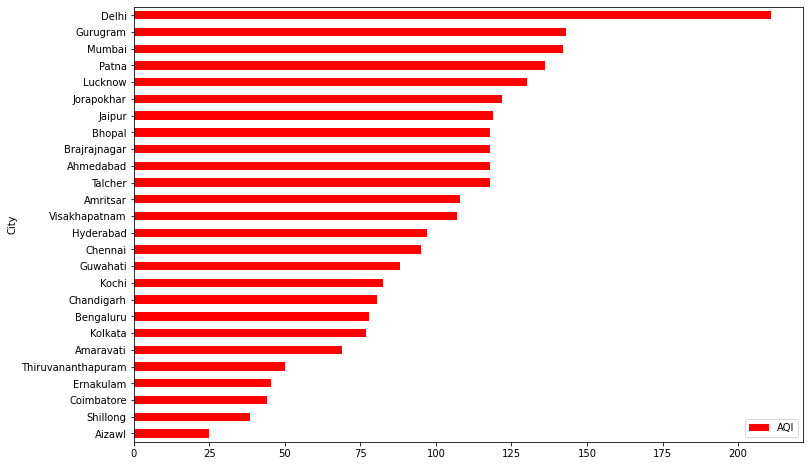

In [ ]:
# 5- most polluted states
df[['AQI', 'City']].groupby(['City']).median().sort_values("AQI", ascending = True).plot.barh(color="r",figsize=(12,8))

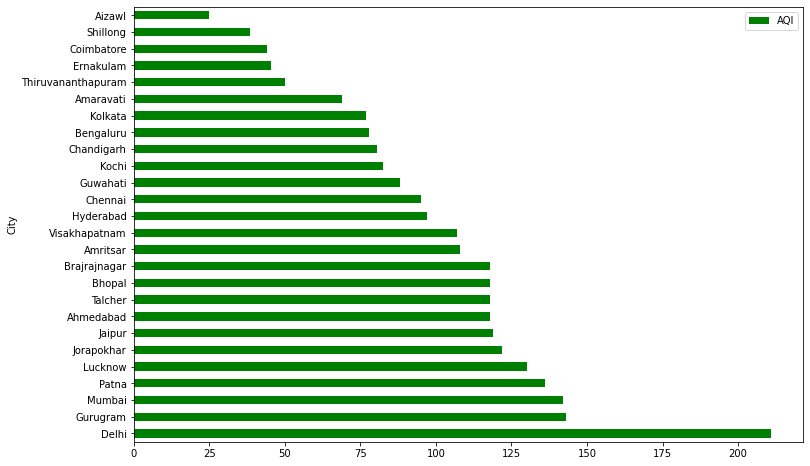

In [ ]:
# 5 Safest Cities
df[['AQI', 'City']].groupby(['City']).median().sort_values("AQI", ascending = False).plot.barh(color="g",figsize=(12,8))

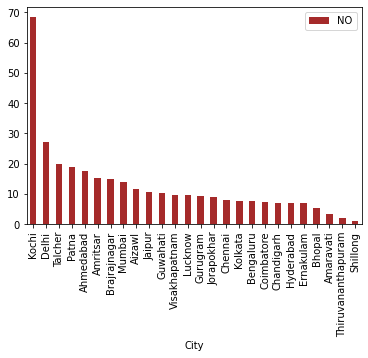

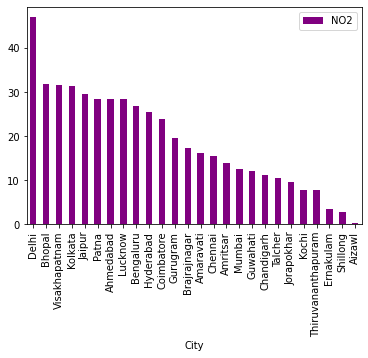

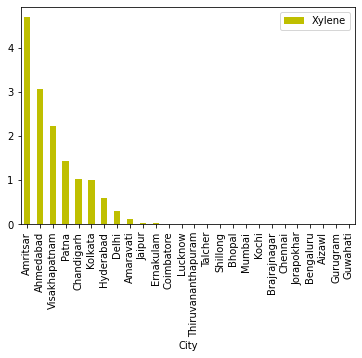

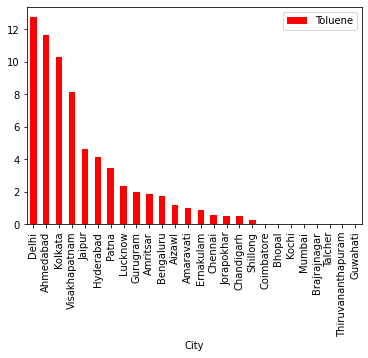

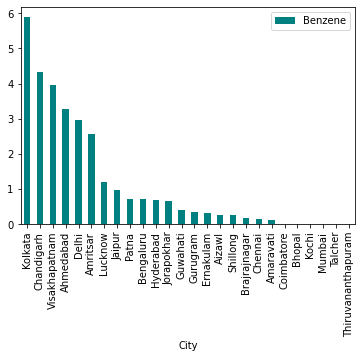

In [ ]:
  df[['NO', 'City']].groupby(['City']).median().sort_values("NO", ascending = False).plot.bar(color='brown')
df[['NO2', 'City']].groupby(['City']).median().sort_values("NO2", ascending = False).plot.bar(color='purple')
df[['Xylene', 'City']].groupby(['City']).median().sort_values("Xylene", ascending = False).plot.bar(color='y')
df[['Toluene', 'City']].groupby(['City']).median().sort_values("Toluene", ascending = False).plot.bar(color='r')
df[['Benzene', 'City']].groupby(['City']).median().sort_values("Benzene", ascending = False).plot.bar(color='teal')

In [ ]:
output=AQI
AQI=int(input("Enter AQI: "))
AQI_bucket(AQI)

Enter AQI: 120


'AQI_bucket=Moderate'

In [ ]:
encoder=preprocessing.LabelEncoder()
for i in df.columns:
    if isinstance(df[i][0],str):
        df[i]=encoder.fit_transform(df[i])

In [ ]:
df=df.drop(["AQI_bucket"],axis=1)

In [ ]:
x=df.drop(["AQI"],axis=1)
x


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
Date,,,,,,,,,,,,,
2015-01-01,0,25.34,137.84,0.92,18.22,17.15,10.06,0.92,27.64,133.36,0.00,0.02,0.00
2015-01-01,4,33.95,37.71,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,0.07
2015-01-01,8,34.20,58.70,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,0.00,0.00
2015-01-01,10,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84
2015-01-01,19,58.73,63.99,2.11,13.46,4.57,9.49,12.15,169.57,25.92,1.35,3.93,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,21,35.42,57.82,44.50,31.15,57.72,1.14,0.82,3.99,25.76,1.73,5.50,2.14
2020-07-01,22,16.70,29.40,0.97,2.70,1.04,2.66,0.10,4.29,17.71,0.00,0.02,0.00
2020-07-01,23,24.85,31.06,27.73,29.36,57.09,1.37,1.52,14.42,14.90,0.00,0.00,0.00


In [ ]:
y=df["AQI"]  

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
regressor = RandomForestRegressor(max_depth=3,min_samples_split=5,n_estimators=70,max_leaf_nodes=6)   
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, max_leaf_nodes=6, min_samples_split=5,
                      n_estimators=70)

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
regressor.score(x_test,y_test)

0.8506010666624394

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))


33.400299872317476

In [ ]:
y.max()

1000.0

In [ ]:
y.min()

8.0

In [ ]:
y.describe()

count    29531.000000
mean       130.099048
std         86.522079
min          8.000000
25%         71.000000
50%        113.000000
75%        161.000000
max       1000.000000
Name: AQI, dtype: float64

In [ ]:

df.head(5)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,,,
2015-01-01,0,25.34,137.84,0.92,18.22,17.15,10.06,0.92,27.64,133.36,0.00,0.02,0.00,138.0
2015-01-01,4,33.95,37.71,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,0.07,38.0
2015-01-01,8,34.20,58.70,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,0.00,0.00,59.0
2015-01-01,10,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,608.0
2015-01-01,19,58.73,63.99,2.11,13.46,4.57,9.49,12.15,169.57,25.92,1.35,3.93,0.00,170.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29531 entries, 2015-01-01 to 2020-07-01
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  int64  
 1   PM2.5    29531 non-null  float64
 2   PM10     29531 non-null  float64
 3   NO       29531 non-null  float64
 4   NO2      29531 non-null  float64
 5   NOx      29531 non-null  float64
 6   NH3      29531 non-null  float64
 7   CO       29531 non-null  float64
 8   SO2      29531 non-null  float64
 9   O3       29531 non-null  float64
 10  Benzene  29531 non-null  float64
 11  Toluene  29531 non-null  float64
 12  Xylene   29531 non-null  float64
 13  AQI      29531 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 3.4 MB


In [ ]:
dc=df.drop(df.iloc[:,0:13],axis = 1)
dc

,AQI
Date,
2015-01-01,138.0
2015-01-01,38.0
2015-01-01,59.0
2015-01-01,608.0
2015-01-01,170.0
...,...
2020-07-01,58.0
2020-07-01,29.0
2020-07-01,57.0


In [ ]:
df=dc.resample(rule="MS").sum()

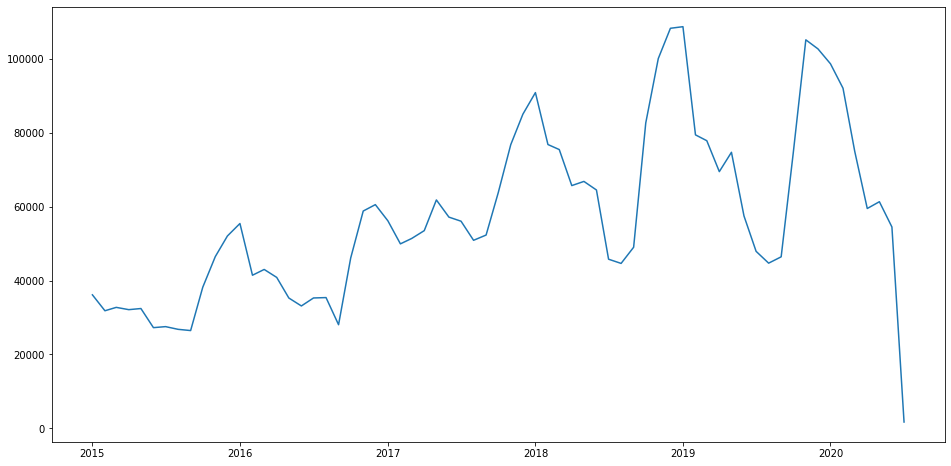

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df)

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(x):
    dftest = adfuller(x, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    if dftest[1] <= 0.05:
        print("We reject the null hypothesis; it is stationary.")
    else:
        print("We accept the null hypothesis; it is seasonal.")

In [ ]:
adf_test(df["AQI"])

Test Statistic                 -1.938493
p-value                         0.314175
#Lags Used                      9.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64
We accept the null hypothesis; it is seasonal.


In [ ]:
df["First_difference"]=df["AQI"]-df["AQI"].shift(1) 

In [ ]:
df.head(14)

,AQI,First_difference
Date,,
2015-01-01,36144.0,NaN
2015-02-01,31833.0,-4311.0
2015-03-01,32751.0,918.0
2015-04-01,32133.0,-618.0
2015-05-01,32438.0,305.0
2015-06-01,27260.0,-5178.0
2015-07-01,27538.0,278.0
2015-08-01,26805.0,-733.0
2015-09-01,26472.0,-333.0


In [ ]:
adf_test(df["First_difference"].dropna())

Test Statistic                -7.379388e+00
p-value                        8.551878e-11
#Lags Used                     8.000000e+00
Number of Observations Used    5.700000e+01
Critical Value (1%)           -3.550670e+00
Critical Value (5%)           -2.913766e+00
Critical Value (10%)          -2.594624e+00
dtype: float64
We reject the null hypothesis; it is stationary.


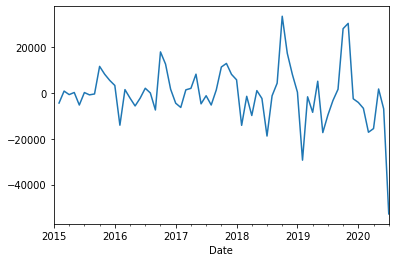

In [ ]:
df["First_difference"].plot()

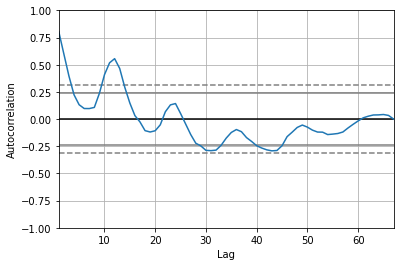

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df["AQI"])
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

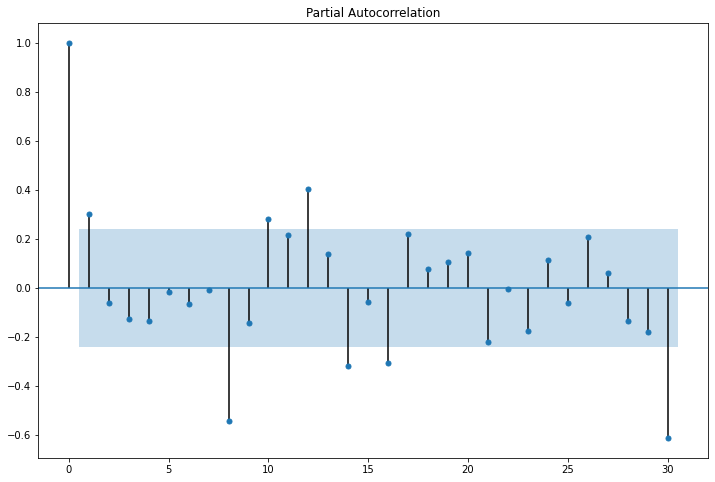

In [ ]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(111)
fig=sm.graphics.tsa.plot_pacf(df["First_difference"].dropna(),lags=30,ax=ax1)

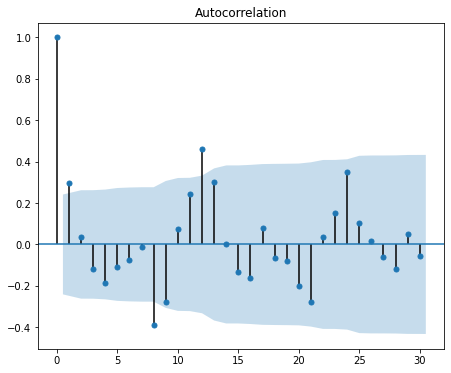

In [ ]:
fig=plt.figure(figsize=(16,6))
ax2=fig.add_subplot(121)
fig=sm.graphics.tsa.plot_acf(df["First_difference"].dropna(),lags=30,ax=ax2)

In [ ]:
train = df["AQI"][:2018-12]
test = df["AQI"][2018-12:]
from statsmodels.tsa.statespace import sarimax

In [ ]:
model=sarimax.SARIMAX(train,order=(0,1,0),seasonal_order=(1,1,0,12),trend="n")
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                AQI   No. Observations:                   67
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -572.993
Date:                            Wed, 09 Nov 2022   AIC                           1149.986
Time:                                    13:27:21   BIC                           1153.964
Sample:                                01-01-2015   HQIC                          1151.520
                                     - 07-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.3716      0.116     -3.193      0.001      -0.600      -0.143
sigma2       9.84e+07   3.11e-10   3.16e+17      0.000    9.84e+07    9.84e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                34.14
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               3.25   Skew:                            -1.06
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

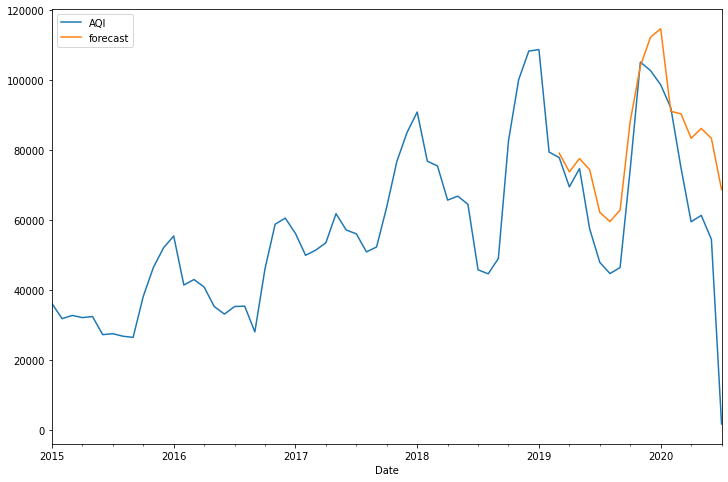

In [ ]:
df["forecast"]=result.predict(start=50,end=100,dynamic=True)
df[["AQI","forecast"]].plot(figsize=(12,8))

In [ ]:
dc

,AQI
Date,
2015-01-01,138.0
2015-01-01,38.0
2015-01-01,59.0
2015-01-01,608.0
2015-01-01,170.0
...,...
2020-07-01,58.0
2020-07-01,29.0
2020-07-01,57.0


In [ ]:
output=AQI
AQI=int(input("Enter AQI: "))
AQI_bucket(AQI)

Enter AQI: 120


'AQI_bucket=Moderate'

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
y_pred=regressor.predict(x_test)
regressor.score(x_test,y_test)

0.8506010666624394

In [ ]:
df.iloc[1]

AQI                 31833.0
First_difference    -4311.0
forecast                NaN
Name: 2015-02-01 00:00:00, dtype: float64

In [ ]:
df.drop("forecast",axis="columns")

,AQI,First_difference
Date,,
2015-01-01,36144.0,NaN
2015-02-01,31833.0,-4311.0
2015-03-01,32751.0,918.0
2015-04-01,32133.0,-618.0
2015-05-01,32438.0,305.0
...,...,...
2020-03-01,74999.0,-17084.0
2020-04-01,59520.0,-15479.0
2020-05-01,61356.0,1836.0


In [ ]:
dc.head()

,AQI
Date,
2015-01-01,138.0
2015-01-01,38.0
2015-01-01,59.0
2015-01-01,608.0
2015-01-01,170.0


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mean_absolute_percentage_error(y_true, y_pred)